# Etude des motifs de préférence musicale Lalala 

In [29]:
import pandas as pd 
import numpy as np 

# import des données 
data = pd.read_csv('../Source/responses.csv')

# on remplit les données manquantes avec NaN 
data = data.replace(r'\s+', np.nan)

# remplacer les variables catégorielles 
for column in data.columns : 
    data[column] = data[column].astype('category')
    data[column] = data[column].cat.codes

print(data.shape)

(1010, 150)


A ce stade, on a des données propres à utiliser. En effet, on a remplacé les variables catégorielles par des variables numériques. On a également remplacé les champs non renseignés par -1, qui est une valeur jamais prise par les variables.

On calcule la matrice de préférence pour l'ensemble du jeu de données. Pour cela, on sépare d'abord les données pour extraire d'une part les champs à comparer (les goûts musicaux) des caractéristiques (données démographiques).

* Music preferences (19 items)
* Movie preferences (12 items)
* Hobbies & interests (32 items)
* Phobias (10 items)
* Health habits (3 items)
* Personality traits, views on life, & opinions (57 items)
* Spending habits (7 items)
* Demographics (10 items)

In [43]:
# premiere colonne : aime la musique ou non
music_ranking = data.iloc[:,0:1]

# note pour chaque type de musique 
data_music = data.iloc[:,2:19]
print(data_music.shape)
print(data_music.columns)

(1010, 17)
Index(['Dance', 'Folk', 'Country', 'Classical music', 'Musical', 'Pop', 'Rock',
       'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska',
       'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 'Techno, Trance',
       'Opera'],
      dtype='object')


On construit la matrice de préférence. Pour cela, on classe sur chaque ligne les styles musicaux du mieux noté au moins bon. Ensuite on calcule les coefficients w(l1,l2) selon si l1 est préféré à l2 ou l'inverse. 
On calcule un coefficient final en moyennant w(l1,l2) sur l'ensemble des observations. Cela donnera la matrice de préférence sur l'ensemble des données 


In [44]:
# on crée la matrice pour stocker les scores de préférences, initialisée à 0 
omega = pd.DataFrame(0,index=data_music.columns, columns=data_music.columns)

# pour chaque ligne
for i in range(len(data_music)): 
    # pour chaque couple de musique
    for column_i in data_music.columns : 
        for column_j in data_music.columns:
            if data_music[column_i][i] < data_music[column_j][i] :
                omega[column_j][column_i] = omega[column_j][column_i]-1
            if data_music[column_i][i] > data_music[column_j][i] : 
                omega[column_j][column_i] = omega[column_j][column_i]+1 
            if data_music[column_i][i] == data_music[column_j][i] : 
                omega[column_j][column_i] = omega[column_j][column_i] 
                
print(omega.head(4))

                 Dance  Folk  Country  Classical music  Musical  Pop  Rock  \
Dance                0   433      480              102      168 -232  -260   
Folk              -433     0       90             -371     -255 -530  -638   
Country           -480   -90        0             -416     -323 -602  -692   
Classical music   -102   371      416                0       94 -248  -412   

                 Metal or Hardrock  Punk  Hiphop, Rap  Reggae, Ska  \
Dance                          324   280          137          162   
Folk                            12   -56         -259         -261   
Country                        -36  -106         -331         -319   
Classical music                289   237            5           70   

                 Swing, Jazz  Rock n roll  Alternative  Latino  \
Dance                    143          -12          154     103   
Folk                    -260         -415         -232    -262   
Country                 -317         -523         -302    -3

In [46]:
def compute_avg(x):
    return x/len(data_music)

omega = omega.apply(compute_avg)
print(omega.head(4))

                    Dance      Folk   Country  Classical music   Musical  \
Dance            0.000000  0.000424  0.000471         0.000100  0.000165   
Folk            -0.000424  0.000000  0.000088        -0.000364 -0.000250   
Country         -0.000471 -0.000088  0.000000        -0.000408 -0.000317   
Classical music -0.000100  0.000364  0.000408         0.000000  0.000092   

                      Pop      Rock  Metal or Hardrock      Punk  Hiphop, Rap  \
Dance           -0.000227 -0.000255           0.000318  0.000274     0.000134   
Folk            -0.000520 -0.000625           0.000012 -0.000055    -0.000254   
Country         -0.000590 -0.000678          -0.000035 -0.000104    -0.000324   
Classical music -0.000243 -0.000404           0.000283  0.000232     0.000005   

                 Reggae, Ska  Swing, Jazz  Rock n roll  Alternative    Latino  \
Dance               0.000159     0.000140    -0.000012     0.000151  0.000101   
Folk               -0.000256    -0.000255    -0.000

On a obtenu la matrice de préférence, sur l'ensemble du jeu de données. 
On sait donc quels genres sont généralement préférés à d'autres. Pour faciliter la visualisation des préférences, on utilise un graphique. L'intensité des couleurs définit la grandeur de la valeur.

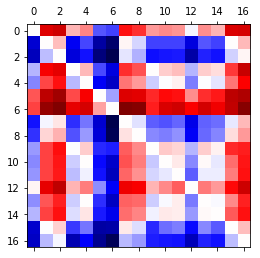

In [47]:
import matplotlib.pyplot as plt

plt.matshow(omega, cmap='seismic')

### interprétation générale 

On observe une diagonale blanche, puisqu'un style musical comparé à lui-même donne bien une préférence de zéro. Une case bleue signifie que le style en abscisse est moins apprécié que celui en ordonnée, et inversement pour une case rouge. 

On notera également une symétrie dans la matrice. Il suffit de prendre la matrice triangulaire inférieure ou supérieure à la diagonale blanche. En effet, soit m1 et m2 deux styles musicaux. On a dans la matrice omega deux cases comparant m1 et m2 : omega[m1][m2] et omega[m2][m1]. On a donc omega[m1][m2] = -omega[m2][m1], donc ces deux cases auront des couleurs opposées de même intensité. 

In [50]:
print(omega.columns[6], " compared to ", omega.columns[2])

print(omega.columns[16], " compared to ", omega.columns[6])

Rock  compared to  Country
Opera  compared to  Rock


La case omega[6][2] (resp. omega[2][6]) compare le Rock et la Country. On remarque que les individus préfèrent largement le Rock par exemple. Ils préfèrent aussi largement le Rock à l'Opéra. 